# Exemplos de iteração com a imagem

Uma imagem aberta com o OpenCV é uma matriz do Numpy.
Para manipular essa imagem, podemos usar a sintaze facilitada dessa API, bem como trabalhar com loops.

In [1]:
%matplotlib inline
import cv2
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.5.0 


Vamos ler uma imagem

In [2]:
imagem = cv2.imread("imagem.png")

Note que, apesar de vermos a imagem como cinza, ela tem as três componentes R, G e B.

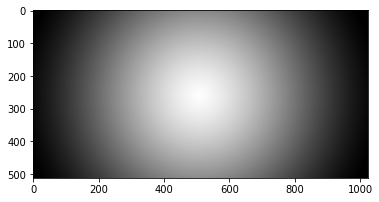

In [3]:
from matplotlib import pyplot as plt
plt.imshow(imagem)
plt.show()

Vamos recordar de como verificar quantos canais a imagem tem

In [4]:
imagem.shape

(512, 1024, 3)

Como criamos a imagem de saída? Uma maneira é criar uma cópia da imagem de entrada (em tons de cinza, neste caso)

In [5]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
saida = imagem_gray.copy()

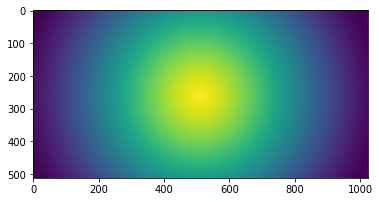

In [6]:
plt.imshow(imagem_gray)
plt.show()

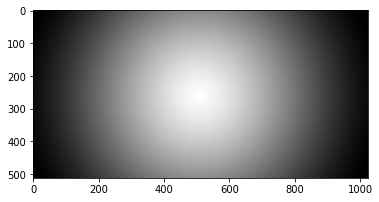

In [7]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Podemos zerar a imagem para usar como saída

In [8]:
saida[:] = 0

Note que, depois de zerar, vemos a imagem toda como preto

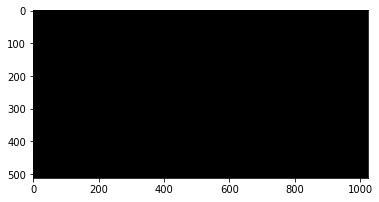

In [9]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Um outro jeito é criar uma imagem usando `np.zeros`, e a informação de `shape` que tínhamos visto antes 

In [10]:
import numpy as np
saida = np.zeros(imagem_gray.shape, dtype=np.uint8)

# Exemplo de como percorrer a imagem com for, copiando pixel a pixel
for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        saida[i][j] = imagem_gray[i][j]

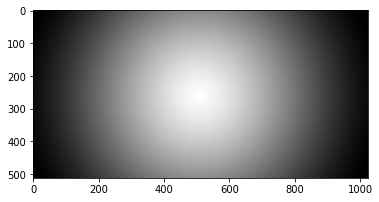

In [11]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Vamos usar o mesmo loop acima para criar uma imagem mais interessante

In [12]:
from math import pi
def scale(valor):  
    return (valor/255.0)*16*pi

In [13]:
from math import cos

for i in range(imagem_gray.shape[0]):
    for j in range(imagem_gray.shape[1]):
        saida[i][j] = 127 + 124.0*cos(scale(imagem_gray[i][j]))

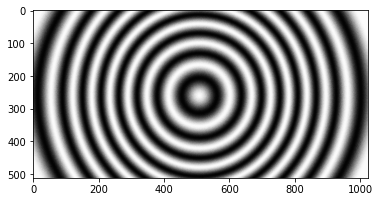

In [14]:
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

Na imagem acima, vamos pintra de branco os pixels maiores do que 128.
Porém, vamos usar a indexação inteligente do Numpy.

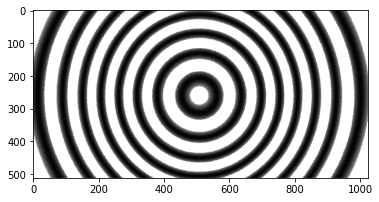

In [15]:
saida[saida > 128] = 255
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

## Para praticar

Baixe uma imagem colorida da internet. Carregue a imagem com o OpenCV, converta para tons de cinza, e faça com que os pixels  maiores ou iguais a 128 fiquem brancos, enquanto os demais fiquem pretos. Faça isso de duas maneiras: a primeira com o laço `for`, e a segunda usando a indexação inteligente do numpy.   

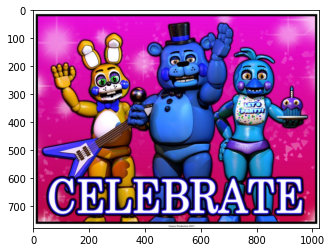

In [16]:
poster = cv2.imread("poster.jpg")
plt.imshow(poster, cmap="gray", vmin=0, vmax=255)
plt.show()

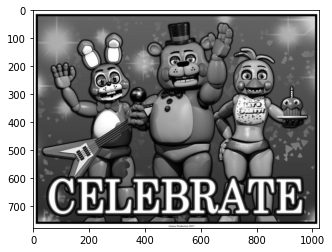

In [17]:
poster_gray = cv2.cvtColor(poster, cv2.COLOR_BGR2GRAY)
plt.imshow(poster_gray, cmap="gray", vmin=0, vmax=255)
plt.show()

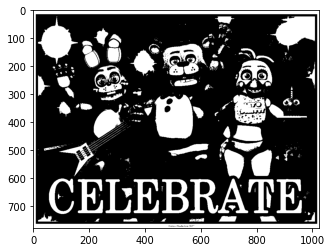

In [18]:
# Usando o laço for
saida = np.zeros(poster_gray.shape, dtype=np.uint8)
for i in range(poster_gray.shape[0]):
    for j in range(poster_gray.shape[1]):
        if poster_gray[i][j] >= 128:
            saida[i][j] = 255
        else:
            saida[i][j] = 0
plt.imshow(saida, cmap="gray", vmin=0, vmax=255)
plt.show()

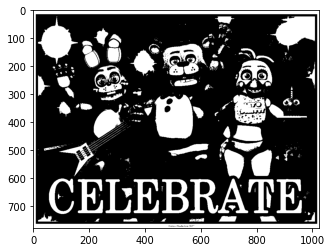

In [19]:
# Usando a indexação inteligente
saida_2 = np.zeros(poster_gray.shape, dtype=np.uint8)
saida_2[saida >= 128] = 255
saida_2[saida < 128] = 0
plt.imshow(saida_2, cmap="gray", vmin=0, vmax=255)
plt.show()